In [1]:
import networkx as nx
import matplotlib.pylab as plt

In [2]:
market = nx.DiGraph()

In [3]:
generation_size = 100
generation = [str(i) for i in range(generation_size)]
market.add_nodes_from(generation)

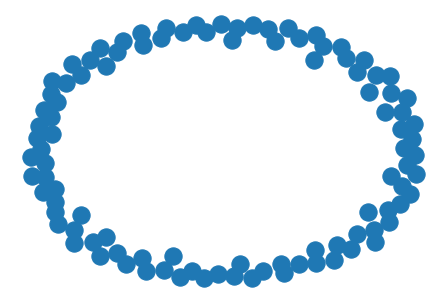

In [4]:
nx.draw(market)

In [6]:
import numpy as np

In [7]:
# nodes of value below the median are male
median = np.median(list(map(lambda x: int(x),market.nodes)))
male = []
female = []
for node in market.nodes:
    if int(node) <= median:
        male.append(node)
        market.node[node]['sex'] = 'male'
    else:
        female.append(node)
        market.node[node]['sex'] = 'female' 

In [8]:
import torch

In [9]:
import pyro
import pyro.distributions as dist

In [10]:
len(male)

50

In [42]:
tmp = dist.Normal(0.,1.)

In [99]:
eps = 10e-10
risk_of_death_by_aging = dist.Beta(7.,1.)
plt.plot(torch.exp(risk_of_death.log_prob(torch.linspace(0.+eps,1.-eps,100))))

In [96]:
# survival function
plt.plot(1-torch.cumsum(torch.exp(risk_of_death.log_prob(torch.linspace(0.+eps,1.-eps,100))),dim=0))

In [122]:
plt.plot(torch.linspace(0.+eps,100.-eps,100))

In [127]:
# female sterility risk
#plt.plot(torch.linspace(0.+eps,100.-eps,100),torch.sigmoid(-31+ torch.linspace(0.+eps,1.-eps,100)))
plt.plot(torch.linspace(0.+eps,100.-eps,100),torch.sigmoid(+31*10*torch.linspace(0.+eps,1.-eps,100)))

In [101]:
male_fitness = pyro.sample('male_fitness', dist.Categorical(probs=torch.ones(len(male))/len(male)).expand_by([len(male)]))
female_fitness = pyro.sample('female_fitness', dist.Categorical(probs=torch.ones(len(female))/len(female)).expand_by([len(female)]))

age_of_death = pyro.sample('female_fitness', risk_of_death.expand_by([generation_size]))*100
age = pyro.sample('age',dist.Uniform(low=0,high=age))
#fertility = 


In [104]:
plt.hist(age,'auto')

(array([19., 18., 12., 12., 13.,  9., 11.,  6.]),
 array([ 1.2422974, 12.829664 , 24.41703  , 36.0044   , 47.591763 ,
        59.17913  , 70.766495 , 82.35387  , 93.94123  ], dtype=float32),
 <a list of 8 Patch objects>)

In [12]:
nx.set_node_attributes(market, {man:int(male_fitness[i]) for i,man in enumerate(male)}, 'fitness')
nx.set_node_attributes(market, {woman:int(female_fitness[i]) for i,woman in enumerate(female)}, 'fitness')

In [13]:
nx.get_node_attributes(market, 'fitness')

{'0': 2,
 '1': 45,
 '2': 4,
 '3': 7,
 '4': 21,
 '5': 7,
 '6': 18,
 '7': 16,
 '8': 37,
 '9': 31,
 '10': 40,
 '11': 14,
 '12': 48,
 '13': 2,
 '14': 35,
 '15': 5,
 '16': 26,
 '17': 34,
 '18': 44,
 '19': 49,
 '20': 14,
 '21': 25,
 '22': 45,
 '23': 10,
 '24': 5,
 '25': 40,
 '26': 40,
 '27': 27,
 '28': 45,
 '29': 13,
 '30': 14,
 '31': 30,
 '32': 11,
 '33': 7,
 '34': 36,
 '35': 30,
 '36': 28,
 '37': 30,
 '38': 22,
 '39': 17,
 '40': 5,
 '41': 7,
 '42': 5,
 '43': 7,
 '44': 35,
 '45': 40,
 '46': 29,
 '47': 19,
 '48': 35,
 '49': 20,
 '50': 10,
 '51': 40,
 '52': 29,
 '53': 24,
 '54': 15,
 '55': 19,
 '56': 18,
 '57': 47,
 '58': 23,
 '59': 27,
 '60': 17,
 '61': 44,
 '62': 44,
 '63': 4,
 '64': 47,
 '65': 7,
 '66': 46,
 '67': 26,
 '68': 10,
 '69': 38,
 '70': 21,
 '71': 45,
 '72': 22,
 '73': 0,
 '74': 32,
 '75': 8,
 '76': 2,
 '77': 48,
 '78': 40,
 '79': 9,
 '80': 20,
 '81': 26,
 '82': 35,
 '83': 48,
 '84': 34,
 '85': 12,
 '86': 31,
 '87': 25,
 '88': 42,
 '89': 23,
 '90': 8,
 '91': 0,
 '92': 29,
 '93': 

In [14]:
# for each pairing between men and women
# let each person yield a mate value judgement (MVJ) of everyone from the other sex
# if the mean MVJ *of* the person is lower or equal than the MVJ of the other, agree to sex
# the true mate value (MV) is the number of opposite sex people who agreed to sex with the person

In [15]:
intercourse = []

In [ ]:
child_resource_cost = 10

In [36]:
def get_male_consent(man, woman):
    return True

In [37]:
def get_female_consent(man, woman):
    return True

In [38]:
# simulate sexual encounters
for man in male:
    for woman in female:
        # MVJ_of_male = pyro.sample('man_MVJ', dist.Normal(market.node[man]['fitness'],1.))
        # a woman will only accept sex with men who commit enough resources to support a child
        # male_investment = market.node[man]['resources']
        female_constent = get_female_consent(man, woman)
        male_consent = get_male_consent(man, woman)
        if male_consent and female_constent:
            intercourse.append((man,woman))

In [41]:
# simulate pregnancy
for man, woman in intercourse:
    market.node[woman]

{'sex': 'female', 'fitness': 10}
{'sex': 'female', 'fitness': 40}
{'sex': 'female', 'fitness': 29}
{'sex': 'female', 'fitness': 24}
{'sex': 'female', 'fitness': 15}
{'sex': 'female', 'fitness': 19}
{'sex': 'female', 'fitness': 18}
{'sex': 'female', 'fitness': 47}
{'sex': 'female', 'fitness': 23}
{'sex': 'female', 'fitness': 27}
{'sex': 'female', 'fitness': 17}
{'sex': 'female', 'fitness': 44}
{'sex': 'female', 'fitness': 44}
{'sex': 'female', 'fitness': 4}
{'sex': 'female', 'fitness': 47}
{'sex': 'female', 'fitness': 7}
{'sex': 'female', 'fitness': 46}
{'sex': 'female', 'fitness': 26}
{'sex': 'female', 'fitness': 10}
{'sex': 'female', 'fitness': 38}
{'sex': 'female', 'fitness': 21}
{'sex': 'female', 'fitness': 45}
{'sex': 'female', 'fitness': 22}
{'sex': 'female', 'fitness': 0}
{'sex': 'female', 'fitness': 32}
{'sex': 'female', 'fitness': 8}
{'sex': 'female', 'fitness': 2}
{'sex': 'female', 'fitness': 48}
{'sex': 'female', 'fitness': 40}
{'sex': 'female', 'fitness': 9}
{'sex': 'female'

{'sex': 'female', 'fitness': 7}
{'sex': 'female', 'fitness': 46}
{'sex': 'female', 'fitness': 26}
{'sex': 'female', 'fitness': 10}
{'sex': 'female', 'fitness': 38}
{'sex': 'female', 'fitness': 21}
{'sex': 'female', 'fitness': 45}
{'sex': 'female', 'fitness': 22}
{'sex': 'female', 'fitness': 0}
{'sex': 'female', 'fitness': 32}
{'sex': 'female', 'fitness': 8}
{'sex': 'female', 'fitness': 2}
{'sex': 'female', 'fitness': 48}
{'sex': 'female', 'fitness': 40}
{'sex': 'female', 'fitness': 9}
{'sex': 'female', 'fitness': 20}
{'sex': 'female', 'fitness': 26}
{'sex': 'female', 'fitness': 35}
{'sex': 'female', 'fitness': 48}
{'sex': 'female', 'fitness': 34}
{'sex': 'female', 'fitness': 12}
{'sex': 'female', 'fitness': 31}
{'sex': 'female', 'fitness': 25}
{'sex': 'female', 'fitness': 42}
{'sex': 'female', 'fitness': 23}
{'sex': 'female', 'fitness': 8}
{'sex': 'female', 'fitness': 0}
{'sex': 'female', 'fitness': 29}
{'sex': 'female', 'fitness': 17}
{'sex': 'female', 'fitness': 14}
{'sex': 'female',

{'sex': 'female', 'fitness': 0}
{'sex': 'female', 'fitness': 32}
{'sex': 'female', 'fitness': 8}
{'sex': 'female', 'fitness': 2}
{'sex': 'female', 'fitness': 48}
{'sex': 'female', 'fitness': 40}
{'sex': 'female', 'fitness': 9}
{'sex': 'female', 'fitness': 20}
{'sex': 'female', 'fitness': 26}
{'sex': 'female', 'fitness': 35}
{'sex': 'female', 'fitness': 48}
{'sex': 'female', 'fitness': 34}
{'sex': 'female', 'fitness': 12}
{'sex': 'female', 'fitness': 31}
{'sex': 'female', 'fitness': 25}
{'sex': 'female', 'fitness': 42}
{'sex': 'female', 'fitness': 23}
{'sex': 'female', 'fitness': 8}
{'sex': 'female', 'fitness': 0}
{'sex': 'female', 'fitness': 29}
{'sex': 'female', 'fitness': 17}
{'sex': 'female', 'fitness': 14}
{'sex': 'female', 'fitness': 17}
{'sex': 'female', 'fitness': 49}
{'sex': 'female', 'fitness': 38}
{'sex': 'female', 'fitness': 10}
{'sex': 'female', 'fitness': 23}
{'sex': 'female', 'fitness': 10}
{'sex': 'female', 'fitness': 40}
{'sex': 'female', 'fitness': 29}
{'sex': 'female'

In [39]:
intercourse

[('0', '50'),
 ('0', '51'),
 ('0', '52'),
 ('0', '53'),
 ('0', '54'),
 ('0', '55'),
 ('0', '56'),
 ('0', '57'),
 ('0', '58'),
 ('0', '59'),
 ('0', '60'),
 ('0', '61'),
 ('0', '62'),
 ('0', '63'),
 ('0', '64'),
 ('0', '65'),
 ('0', '66'),
 ('0', '67'),
 ('0', '68'),
 ('0', '69'),
 ('0', '70'),
 ('0', '71'),
 ('0', '72'),
 ('0', '73'),
 ('0', '74'),
 ('0', '75'),
 ('0', '76'),
 ('0', '77'),
 ('0', '78'),
 ('0', '79'),
 ('0', '80'),
 ('0', '81'),
 ('0', '82'),
 ('0', '83'),
 ('0', '84'),
 ('0', '85'),
 ('0', '86'),
 ('0', '87'),
 ('0', '88'),
 ('0', '89'),
 ('0', '90'),
 ('0', '91'),
 ('0', '92'),
 ('0', '93'),
 ('0', '94'),
 ('0', '95'),
 ('0', '96'),
 ('0', '97'),
 ('0', '98'),
 ('0', '99'),
 ('1', '50'),
 ('1', '51'),
 ('1', '52'),
 ('1', '53'),
 ('1', '54'),
 ('1', '55'),
 ('1', '56'),
 ('1', '57'),
 ('1', '58'),
 ('1', '59'),
 ('1', '60'),
 ('1', '61'),
 ('1', '62'),
 ('1', '63'),
 ('1', '64'),
 ('1', '65'),
 ('1', '66'),
 ('1', '67'),
 ('1', '68'),
 ('1', '69'),
 ('1', '70'),
 ('1',

In [18]:
# male attraction to a female
# depends on her fitness and fertility (probability of getting pregnant from sex with fertile male)
# fertility depends on her age and parent's fertility


In [19]:
# sample male's attraction to female from Gaussian centered its mate value estimate of the female
# and vice versa
# find distance between their respective fitness
# 

In [20]:
# now we make each node rate the other sex

In [21]:
market.add_edges_from(intercourse)

In [22]:
fitness_alpha = np.array(list(nx.get_node_attributes(market, 'fitness').values()))

In [23]:
fitness_alpha -= fitness_alpha.min()
fitness_alpha = fitness_alpha/fitness_alpha.max()

In [31]:
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(male) ) # put nodes from X at x=1
pos.update( (n, (2, i)) for i, n in enumerate(female) ) # put nodes from Y at x=2

In [128]:
%matplotlib qt
nx.draw(market, pos = pos, node_size=fitness_alpha*100)

/home/folzd/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/folzd/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes
